In [1]:
# Goals

# Identify Players Values + Rankings

# Player Effeciency Analysis
#    +/- or other stats per point?
#    conversion rates per possession for O and D
#    number of break chances (avg per point) (break chances converted %)
#    clean holds (% of all holds)

# Line Effeciency Analysis?
#    how many line combinations are there?

# pass to goal and pass to turnover ratios


# Player performance vs game state
# does someone perform better when they're down 3, up 3, or on universe?

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read data
df = pd.read_csv("justice_data.csv")

In [4]:
# Clean up dataframe

# Remove unnecessay columns
df = df.drop(columns=['Player 7', 'Player 8', 'Player 9', 'Player 10', 'Player 11', 'Player 12', 
           'Player 13', 'Player 14', 'Player 15', 'Player 16', 'Player 17', 'Player 18',
          'Player 19', 'Player 20', 'Player 21', 'Player 22', 'Player 23', 'Player 24',
          'Player 25', 'Player 26', 'Player 27'])
df = df.drop(columns=['Elapsed Time (secs)', 'Begin Area' , 'Begin X',
                              'Begin Y', 'End Area', 'End X', 'End Y', 'Distance Unit of Measure', 
                              'Absolute Distance', 'Lateral Distance', 'Toward Our Goal Distance'])

# Change Date/Time to datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Rename columns
df = df.rename(columns={'Tournamemnt': 'Tournament'})

# Add column to track what point
df.insert(4, 'Point', df['Our Score - End of Point'] + df['Their Score - End of Point'])

In [5]:
# Sort dataframe by Date/Time and rename to 'action_df'
action_df = df.sort_values(by=['Date/Time', 'Point']).reset_index(drop=True)

In [6]:
action_df['Opponent'].value_counts()

Opponent
Elon                 491
Maryland             440
Duke                 372
NC State             362
UNCW                 340
Georgia Tech         251
JMU                  220
BC                   217
Virginia             215
App State            213
William & Mary       212
American             204
UPenn                194
Ohio State           180
NYU                  180
JHop                 176
Princeton            172
GW                   171
Appalachian State    168
Syracuse             167
Pitt-B               166
VTech                165
Deleware             148
Juice                138
Temple               122
Dartmouth             78
Test                  12
W&M                    7
Name: count, dtype: int64

In [7]:
action_df.drop(action_df.loc[action_df['Opponent']=='Test'].index, inplace=True)
action_df.drop(action_df.loc[action_df['Opponent']=='W&M'].index, inplace=True)

In [8]:
action_df['Opponent'].value_counts()

Opponent
Elon                 491
Maryland             440
Duke                 372
NC State             362
UNCW                 340
Georgia Tech         251
JMU                  220
BC                   217
Virginia             215
App State            213
William & Mary       212
American             204
UPenn                194
NYU                  180
Ohio State           180
JHop                 176
Princeton            172
GW                   171
Appalachian State    168
Syracuse             167
Pitt-B               166
VTech                165
Deleware             148
Juice                138
Temple               122
Dartmouth             78
Name: count, dtype: int64

In [9]:
action_df.head()

,Date/Time,Tournament,Opponent,Point Elapsed Seconds,Point,Line,Our Score - End of Point,Their Score - End of Point,Event Type,Action,...,Receiver,Defender,Hang Time (secs),Player 0,Player 1,Player 2,Player 3,Player 4,Player 5,Player 6
0,2025-02-01 07:57:00,Carolina Kickoff,Elon,26,1,D,0,1,Defense,Pull,...,NaN,Bilal,4.946,Bilal,Datz,Schray,Simon,David,Hawk,Jacob
1,2025-02-01 07:57:00,Carolina Kickoff,Elon,26,1,D,0,1,Defense,Goal,...,NaN,Anonymous,NaN,Bilal,Datz,Schray,Simon,David,Hawk,Jacob
2,2025-02-01 07:57:00,Carolina Kickoff,Elon,24,2,O,1,1,Offense,Catch,...,Chris,NaN,NaN,Portner,Ezra,Chris,Schmitty,Charlie,Javi,Kaden
3,2025-02-01 07:57:00,Carolina Kickoff,Elon,24,2,O,1,1,Offense,Catch,...,Javi,NaN,NaN,Portner,Ezra,Chris,Schmitty,Charlie,Javi,Kaden
4,2025-02-01 07:57:00,Carolina Kickoff,Elon,24,2,O,1,1,Offense,Catch,...,Schmitty,NaN,NaN,Portner,Ezra,Chris,Schmitty,Charlie,Javi,Kaden


In [10]:
# Create point dataframe
point_df = df.groupby(['Date/Time', 'Tournament', 'Opponent', 'Point']) \
                    .agg({
                        'Our Score - End of Point' : 'max', 
                        'Their Score - End of Point': 'max',
                        'Point Elapsed Seconds': 'max',
                        'Line': 'first',
                        'Player 0': 'first', 'Player 1': 'first', 'Player 2': 'first',
                        'Player 3': 'first', 'Player 4': 'first', 'Player 5': 'first', 'Player 6': 'first',
                    }).reset_index()
point_df.insert(6, 'Result of Point', '?')
point_df.insert(7, 'Possessions', np.nan)
point_df.head(10)

,Date/Time,Tournament,Opponent,Point,Our Score - End of Point,Their Score - End of Point,Result of Point,Possessions,Point Elapsed Seconds,Line,Player 0,Player 1,Player 2,Player 3,Player 4,Player 5,Player 6
0,2025-02-01 07:57:00,Carolina Kickoff,Elon,1,0,1,?,NaN,26,D,Bilal,Datz,Schray,Simon,David,Hawk,Jacob
1,2025-02-01 07:57:00,Carolina Kickoff,Elon,2,1,1,?,NaN,24,O,Portner,Ezra,Chris,Schmitty,Charlie,Javi,Kaden
2,2025-02-01 07:57:00,Carolina Kickoff,Elon,3,1,2,?,NaN,43,D,Bilal,Datz,Simon,Sauce,David,Hawk,Jacob
3,2025-02-01 07:57:00,Carolina Kickoff,Elon,4,1,3,?,NaN,168,O,Brooks,Portner,Ezra,Chris,Schmitty,Charlie,Javi
4,2025-02-01 07:57:00,Carolina Kickoff,Elon,5,2,3,?,NaN,355,O,Brooks,Bilal,Portner,Chris,Schmitty,Charlie,Kaden
5,2025-02-01 07:57:00,Carolina Kickoff,Elon,6,3,3,?,NaN,46,D,Bilal,Datz,Simon,Sauce,David,Javi,Jacob
6,2025-02-01 07:57:00,Carolina Kickoff,Elon,7,3,4,?,NaN,81,D,Bilal,Datz,Simon,David,Hawk,Jacob,Nikolai
7,2025-02-01 07:57:00,Carolina Kickoff,Elon,8,3,5,?,NaN,175,O,Portner,Ezra,Chris,Schmitty,Charlie,Javi,Kaden
8,2025-02-01 07:57:00,Carolina Kickoff,Elon,9,3,6,?,NaN,203,O,Bilal,Portner,Ezra,Chris,Schmitty,Javi,Kaden
9,2025-02-01 07:57:00,Carolina Kickoff,Elon,10,4,6,?,NaN,46,O,Datz,Ezra,Simon,Chris,Schmitty,Charlie,Javi


In [11]:
# Add a new column that tracks whether the line held, was held on, broke, or was broken
def add_result_column(df):
    previous_score = [0,0]
    game_of_previous_point = ''
    
    for index, row in df.iterrows():
        game_of_current_point = row['Date/Time']
        current_score = [row['Our Score - End of Point'],row['Their Score - End of Point']]
        line = row['Line']
        
        if game_of_current_point != game_of_previous_point:
            previous_score = [0,0]
        
        # We scored
        if current_score == [previous_score[0]+1, previous_score[1]]:
            # We held
            if line == 'O':
                df.loc[index, 'Result of Point'] = 'Hold'
            # We broke
            elif line == 'D':
                df.loc[index, 'Result of Point'] = 'Break'
        # They scored
        elif current_score == [previous_score[0], previous_score[1]+1]:
            if line == 'O':
                df.loc[index, 'Result of Point'] = 'Broken'
            # We broke
            elif line == 'D':
                df.loc[index, 'Result of Point'] = 'Held On'
        
        game_of_previous_point = game_of_current_point
        previous_score = current_score
    return df

point_df = add_result_column(point_df)

In [12]:
# Add new columns to track the amount of possessions, passes, blocks, and turnovers per point
def add_stat_columns(action_df, point_df):
    possessions = []
    passes = []
    turnovers = []
    blocks = []
    
    for index, row in point_df.iterrows():
        # New point is started
        current_game = row['Date/Time']
        our_score = row['Our Score - End of Point']
        their_score = row['Their Score - End of Point']

        # Get all actions in action_df from this point
        point_actions = action_df[
            (action_df['Date/Time'] == current_game) &
            (action_df['Our Score - End of Point'] == our_score) &
            (action_df['Their Score - End of Point'] == their_score)
        ]

        possession_count = 0
        pass_count = 0
        turn_count = 0
        block_count = 0
        
        # Team started on Offense
        if row['Line'] == 'O':
            possession_count += 1

        for _, action in point_actions.iterrows():
            if action['Event Type'] == 'Defense':
                # Block occurred
                if action['Action'] == 'D':
                    possession_count += 1
                    block_count += 1
                # Opposing throwaway occurred
                elif action['Action'] == 'Throwaway':
                    possession_count += 1
                    
            elif action['Event Type'] == 'Offense':
                # Pass is completed
                if action['Action'] in ['Catch', 'Goal']:
                    pass_count += 1
                # Turnover occurred
                elif action['Action'] in ['Throwaway', 'Drop', 'Callahan', 'Stall']:
                    turn_count += 1
                    
        possessions.append(possession_count)
        passes.append(pass_count)
        turnovers.append(turn_count)
        blocks.append(block_count)
        
    point_df['Possessions'] = possessions
    point_df['Passes'] = passes
    point_df['Turnovers'] = turnovers
    point_df['Blocks'] = blocks
    
    return point_df

point_df = add_stat_columns(action_df, point_df)

In [13]:
point_df.head()

,Date/Time,Tournament,Opponent,Point,Our Score - End of Point,Their Score - End of Point,Result of Point,Possessions,Point Elapsed Seconds,Line,Player 0,Player 1,Player 2,Player 3,Player 4,Player 5,Player 6,Passes,Turnovers,Blocks
0,2025-02-01 07:57:00,Carolina Kickoff,Elon,1,0,1,Held On,0,26,D,Bilal,Datz,Schray,Simon,David,Hawk,Jacob,0,0,0
1,2025-02-01 07:57:00,Carolina Kickoff,Elon,2,1,1,Hold,1,24,O,Portner,Ezra,Chris,Schmitty,Charlie,Javi,Kaden,5,0,0
2,2025-02-01 07:57:00,Carolina Kickoff,Elon,3,1,2,Held On,0,43,D,Bilal,Datz,Simon,Sauce,David,Hawk,Jacob,0,0,0
3,2025-02-01 07:57:00,Carolina Kickoff,Elon,4,1,3,Broken,3,168,O,Brooks,Portner,Ezra,Chris,Schmitty,Charlie,Javi,16,3,2
4,2025-02-01 07:57:00,Carolina Kickoff,Elon,5,2,3,Hold,3,355,O,Brooks,Bilal,Portner,Chris,Schmitty,Charlie,Kaden,29,2,1


In [14]:
# What player stats do we want?

# assists, completions, throwaways, passing %, stalls
# goals, catches, touches?, drops, catching %
# games played, points played, minutes played (all 3 in one function? grouping), O points, D points
# Ds, pulls?, callahans?

# season +/-, +/- per point
# O conversion %, D conversion %, total conversion %??, clean hold %
# 

In [15]:
# Create player dataframe
def getPlayerNames(df):
    names = {}
    
    for index, row in df.iterrows():
        players = [row[f'Player {i}'] for i in range(7)]
        
        for player in players:
            if player not in names:
                names[player] = True
    
    return names

player_df = pd.DataFrame({'Name': name} for name in getPlayerNames(action_df))

In [16]:
# Reorder dataframe
player_df.sort_values(by='Name', inplace=True)
player_df.reset_index(drop=True, inplace=True)

In [17]:
# Add columns to player dataframe
player_df['+/-'] = np.nan
player_df['Points'] = np.nan
player_df['Goals'] = np.nan
player_df['Assists'] = np.nan
player_df['Blocks'] = np.nan
player_df['Completions'] = np.nan
player_df['Comp %'] = np.nan
player_df['Throwaways'] = np.nan
player_df['Passes Dropped'] = np.nan
player_df['Throwing Attempts'] = np.nan
player_df['Catches'] = np.nan
player_df['Catch %'] = np.nan
player_df['Drops'] = np.nan

In [18]:
# Get player passing stats
def getPassingStats(player_df, action_df):
    
    # Iterate through players
    for index, row in player_df.iterrows():
        assists = 0
        completions = 0
        throwaways = 0
        drops = 0
        
        player = row['Name']
        
        # Get all passing actions for the player
        player_actions = action_df[action_df['Passer'] == player]
                
        # Iterate through actions
        for _, action in player_actions.iterrows():
            result = action['Action']
            
            if result == "Goal":
                assists += 1
                completions += 1
            elif result == "Catch":
                completions += 1
            elif result in ["Throwaway", "Callahan"]:
                throwaways += 1
            elif result == "Drop":
                drops += 1
        
        total_attempts = completions + throwaways + drops
        comp_pct = (completions / total_attempts) * 100 if total_attempts > 0 else 0
        
        player_df.at[index, 'Assists'] = assists
        player_df.at[index, 'Completions'] = completions
        player_df.at[index, 'Comp %'] = round(comp_pct,3)
        player_df.at[index, 'Throwaways'] = throwaways
        player_df.at[index, 'Passes Dropped'] = drops
        player_df.at[index, 'Throwing Attempts'] = completions + throwaways + drops
    return player_df

player_df = getPassingStats(player_df, action_df)

In [19]:
# Get player receiving stats
def getReceivingStats(player_df, action_df):
    
    # Iterate through players
    for index, row in player_df.iterrows():
        goals = 0
        catches = 0
        drops = 0
        
        player = row['Name']
        
        # Get all receiving actions for the player
        player_actions = action_df[action_df['Receiver'] == player]
                
        # Iterate through actions
        for _, action in player_actions.iterrows():
            result = action['Action']
            
            if result == "Goal":
                goals += 1
                catches += 1
            elif result == "Catch":
                catches += 1
            elif result == "Drop":
                drops += 1
        
        catch_pct = (catches / (catches + drops)) * 100 if (catches + drops) > 0 else 0
        
        player_df.at[index, 'Goals'] = goals
        player_df.at[index, 'Catches'] = catches
        player_df.at[index, 'Catch %'] = round(catch_pct,3)
        player_df.at[index, 'Drops'] = drops

    return player_df

player_df = getReceivingStats(player_df, action_df)

In [20]:
# Get player defensive stats
def getDefensiveStats(player_df, action_df):
    
    # Iterate through players
    for index, row in player_df.iterrows():
        blocks = 0
        callahans = 0
        
        player = row['Name']
        
        # Get all defensive actions for the player
        player_actions = action_df[action_df['Defender'] == player]
                
        # Iterate through actions
        for _, action in player_actions.iterrows():
            result = action['Action']
            
            if result == "D":
                blocks += 1
            elif result == "Callahan":
                callahans += 1
                
        player_df.at[index, 'Blocks'] = blocks
        player_df.at[index, 'Goals'] += callahans

    return player_df

player_df = getDefensiveStats(player_df, action_df)

In [21]:
player_df.head()

,Name,+/-,Points,Goals,Assists,Blocks,Completions,Comp %,Throwaways,Passes Dropped,Throwing Attempts,Catches,Catch %,Drops
0,Aidan,NaN,NaN,2.0,0.0,6.0,10.0,90.909,1.0,0.0,11.0,12.0,92.308,1.0
1,Albert,NaN,NaN,1.0,0.0,1.0,4.0,80.000,1.0,0.0,5.0,6.0,85.714,1.0
2,Andreas,NaN,NaN,15.0,1.0,16.0,25.0,73.529,7.0,2.0,34.0,46.0,90.196,5.0
3,Bilal,NaN,NaN,31.0,54.0,30.0,335.0,84.171,53.0,10.0,398.0,375.0,98.684,5.0
4,Brooks,NaN,NaN,20.0,1.0,7.0,92.0,94.845,3.0,2.0,97.0,116.0,97.479,3.0


In [22]:
# Set values for +/-, points, and turnovers
player_df['Points'] = player_df['Goals'] + player_df['Assists']
player_df['+/-'] = player_df['Points'] + player_df['Blocks'] - player_df['Throwaways'] - player_df['Drops']
player_df['Turnovers'] = player_df['Throwaways'] + player_df['Drops']

In [23]:
player_df.head()

,Name,+/-,Points,Goals,Assists,Blocks,Completions,Comp %,Throwaways,Passes Dropped,Throwing Attempts,Catches,Catch %,Drops,Turnovers
0,Aidan,6.0,2.0,2.0,0.0,6.0,10.0,90.909,1.0,0.0,11.0,12.0,92.308,1.0,2.0
1,Albert,0.0,1.0,1.0,0.0,1.0,4.0,80.000,1.0,0.0,5.0,6.0,85.714,1.0,2.0
2,Andreas,20.0,16.0,15.0,1.0,16.0,25.0,73.529,7.0,2.0,34.0,46.0,90.196,5.0,12.0
3,Bilal,57.0,85.0,31.0,54.0,30.0,335.0,84.171,53.0,10.0,398.0,375.0,98.684,5.0,58.0
4,Brooks,22.0,21.0,20.0,1.0,7.0,92.0,94.845,3.0,2.0,97.0,116.0,97.479,3.0,6.0


In [24]:
# Get player play time stats
def getPlayTimeStats(player_df, point_df):
    
    # {[games played], minutes played, points played, o points, o possessions, d points, d possessions}
    playTimeStats = {}
    
    for _, row in point_df.iterrows():
        players = [row[f'Player {i}'] for i in range(7)]

        game = row['Date/Time']
        line = row['Line']
        possessions = row['Possessions']
        minutes = round(row['Point Elapsed Seconds'] / 60, 2) # Convert to minutes
        
        for player in players:
            if pd.notna(player): # Ensure player name is valid
                if player not in playTimeStats:
                    playTimeStats[player] = [[],0,0,0,0,0,0]
                
                # Add game to list of games played
                if game not in playTimeStats[player][0]:
                    playTimeStats[player][0].append(game)
                
                # Add minutes to minute total
                playTimeStats[player][1] += minutes
                
                # Increment points played
                playTimeStats[player][2] += 1
                
                # Increment either O or D points played
                if line == 'O':
                    playTimeStats[player][3] += 1
                    playTimeStats[player][4] += possessions 
                else:
                    playTimeStats[player][5] += 1
                    playTimeStats[player][6] += possessions
    
    for player in playTimeStats.keys():
        playTimeStats[player][0] = len(playTimeStats[player][0])
        
    player_df[['Games Played', 'Minutes Played', 'Points Played', 'O Points', 'O Possessions', 'D Points', 'D Possessions']] = player_df['Name'].map(playTimeStats).apply(pd.Series)

    return player_df

player_df = getPlayTimeStats(player_df, point_df)

In [25]:
# Check if any players were subbed throughout the season
def checkSubs(df):
    prev_players = []
    prev_point = []
    
    for index, row in df.iterrows():
        point = [row['Date/Time'], row['Point']]
        players = [row[f'Player {i}'] for i in range(7)]
        
        # we are on the same point
        if point == prev_point:
            # check if players have changed
            if players != prev_players:
                print(f"Player subbed in Game: {row['Date/Time']} vs {row['Opponent']} during point {row['Point']}")
        else:
            # new point, so update point
            prev_point = point
        
        prev_players = players

checkSubs(action_df)

In [26]:
player_df

,Name,+/-,Points,Goals,Assists,Blocks,Completions,Comp %,Throwaways,Passes Dropped,...,Catch %,Drops,Turnovers,Games Played,Minutes Played,Points Played,O Points,O Possessions,D Points,D Possessions
0,Aidan,6.0,2.0,2.0,0.0,6.0,10.0,90.909,1.0,0.0,...,92.308,1.0,2.0,23.0,154.82,86.0,4.0,5.0,82.0,95.0
1,Albert,0.0,1.0,1.0,0.0,1.0,4.0,80.000,1.0,0.0,...,85.714,1.0,2.0,14.0,63.35,43.0,21.0,29.0,22.0,22.0
2,Andreas,20.0,16.0,15.0,1.0,16.0,25.0,73.529,7.0,2.0,...,90.196,5.0,12.0,26.0,352.99,199.0,16.0,25.0,183.0,176.0
3,Bilal,57.0,85.0,31.0,54.0,30.0,335.0,84.171,53.0,10.0,...,98.684,5.0,58.0,25.0,513.88,293.0,161.0,260.0,132.0,136.0
4,Brooks,22.0,21.0,20.0,1.0,7.0,92.0,94.845,3.0,2.0,...,97.479,3.0,6.0,25.0,309.80,179.0,146.0,241.0,33.0,24.0
5,Charlie,120.0,98.0,88.0,10.0,37.0,138.0,97.183,4.0,0.0,...,95.339,11.0,15.0,27.0,532.04,319.0,231.0,366.0,88.0,90.0
6,Chilmaid,7.0,9.0,4.0,5.0,8.0,41.0,83.673,6.0,2.0,...,92.000,4.0,10.0,28.0,197.65,113.0,5.0,6.0,108.0,116.0
7,Chris,30.0,58.0,9.0,49.0,12.0,391.0,89.679,36.0,9.0,...,98.847,4.0,40.0,32.0,566.43,310.0,99.0,157.0,211.0,205.0
8,Datz,30.0,83.0,12.0,71.0,32.0,565.0,84.328,75.0,30.0,...,97.868,10.0,85.0,30.0,727.70,400.0,156.0,247.0,244.0,256.0
9,David,20.0,12.0,10.0,2.0,14.0,60.0,92.308,3.0,2.0,...,95.833,3.0,6.0,32.0,331.83,188.0,11.0,14.0,177.0,173.0


Text(0.5, 1.0, 'Player Goals vs Assists')

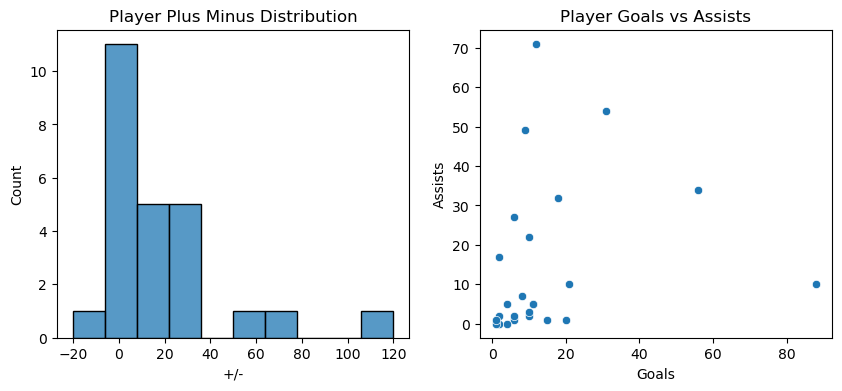

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))  # 1 row, 2 columns of subplots

# Plotting
sns.histplot(data=player_df, x='+/-', ax=axes[0])
axes[0].set_title("Player Plus Minus Distribution")
sns.scatterplot(data=player_df, x='Goals', y='Assists', ax=axes[1])
axes[1].set_title("Player Goals vs Assists")

In [28]:
# Scoring production stats
# ----------------------------
# by point

# Holds / O points played = O Line Conversion Rate (OffCnv) (high)
# Breaks / D points played = D Line Conversion Rate (DefCnv) (low)

# Broken / O points played = O Line Failure Rate (OFail) (low)
# Held On / D points played = D Line Failure Rate (DFail) (high)


# ----------------------------
# by possession

# O Line points scored with 1 possession / O points played = Clean Hold Rate (ClnHld)
# D Line points with 0 possessions / D points played = Clean Failure Rate (ClnFail)

# D Line points scored / D line possessions = Break Conversion Rate (BCR)

# Holds / O posessions = Offensive possession conversion rate (OPCR)
# Breaks / D possessions = Defensive possession conversion rate (DPCR)

In [29]:
# Get player production stats
def getPointProductionStats(player_df, point_df):
    
    # OffCnv, DefCnv, OFail, DFail
    # {O points, Holds, Broken, D points, Breaks, Held On}
    pointResults = {}
    
    for _, row in point_df.iterrows():
        players = [row[f'Player {i}'] for i in range(7)]

        line = row['Line']
        result = row['Result of Point']
        
        
        for player in players:
            if pd.notna(player): # Ensure player name is valid
                if player not in pointResults:
                    pointResults[player] = [[0,0,0],[0,0,0]]
                
                # O Line Point
                if line == "O":
                    pointResults[player][0][0] += 1
                    
                    if result == "Hold": 
                        pointResults[player][0][1] += 1 # Line Held
                    else:
                        pointResults[player][0][2] += 1 # Line Broken
                
                # D Line Point        
                else:
                    pointResults[player][1][0] += 1 
                    
                    if result == "Break": 
                        pointResults[player][1][1] += 1 # Line Broke
                    else:
                        pointResults[player][1][2] += 1 # Line Held On
                    
    # [ [O points, Holds, Broken] , [D points, Breaks, Held On] ]

    # (Holds / O pts), (Breaks, D pts), (Broken, O pts), (Held On, D pts)
    productionStats = {player: [(stats[0][1] / stats[0][0]) * 100, # OffCnv
                                (stats[1][1] / stats[1][0]) * 100, # DefCnv
                                (stats[0][2] / stats[0][0]) * 100, # OFail
                                (stats[1][2] / stats[1][0]) * 100  # DFail
                               ] for player, stats in pointResults.items()}
    
    #print(productionStats)
    player_df[['Off Conv %', 'Def Conv %', 'Off Fail %', 'Def Fail %']] = player_df['Name'].map(productionStats).apply(pd.Series)
    player_df = player_df.round({'Off Conv %': 3, 'Def Conv %': 3, 'Off Fail %': 3, 'Def Fail %': 3})

    return player_df

player_df = getPointProductionStats(player_df, point_df)

In [30]:
# Classify players based on which line they primarily played on
def classify_line(row, threshold=1.5):
    o = row['O Points']
    d = row['D Points']
    
    if o > d * threshold:
        return 'O'
    elif d > o * threshold:
        return 'D'
    else:
        return '2 Way'

player_df['Line'] = player_df.apply(classify_line, axis=1)

player_df

,Name,+/-,Points,Goals,Assists,Blocks,Completions,Comp %,Throwaways,Passes Dropped,...,Points Played,O Points,O Possessions,D Points,D Possessions,Off Conv %,Def Conv %,Off Fail %,Def Fail %,Line
0,Aidan,6.0,2.0,2.0,0.0,6.0,10.0,90.909,1.0,0.0,...,86.0,4.0,5.0,82.0,95.0,25.000,39.024,75.000,60.976,D
1,Albert,0.0,1.0,1.0,0.0,1.0,4.0,80.000,1.0,0.0,...,43.0,21.0,29.0,22.0,22.0,61.905,18.182,38.095,81.818,2 Way
2,Andreas,20.0,16.0,15.0,1.0,16.0,25.0,73.529,7.0,2.0,...,199.0,16.0,25.0,183.0,176.0,62.500,42.077,37.500,57.923,D
3,Bilal,57.0,85.0,31.0,54.0,30.0,335.0,84.171,53.0,10.0,...,293.0,161.0,260.0,132.0,136.0,73.913,50.758,26.087,49.242,2 Way
4,Brooks,22.0,21.0,20.0,1.0,7.0,92.0,94.845,3.0,2.0,...,179.0,146.0,241.0,33.0,24.0,69.863,30.303,30.137,69.697,O
5,Charlie,120.0,98.0,88.0,10.0,37.0,138.0,97.183,4.0,0.0,...,319.0,231.0,366.0,88.0,90.0,67.532,53.409,32.468,46.591,O
6,Chilmaid,7.0,9.0,4.0,5.0,8.0,41.0,83.673,6.0,2.0,...,113.0,5.0,6.0,108.0,116.0,60.000,43.519,40.000,56.481,D
7,Chris,30.0,58.0,9.0,49.0,12.0,391.0,89.679,36.0,9.0,...,310.0,99.0,157.0,211.0,205.0,66.667,43.602,33.333,56.398,D
8,Datz,30.0,83.0,12.0,71.0,32.0,565.0,84.328,75.0,30.0,...,400.0,156.0,247.0,244.0,256.0,66.026,47.541,33.974,52.459,D
9,David,20.0,12.0,10.0,2.0,14.0,60.0,92.308,3.0,2.0,...,188.0,11.0,14.0,177.0,173.0,63.636,37.853,36.364,62.147,D


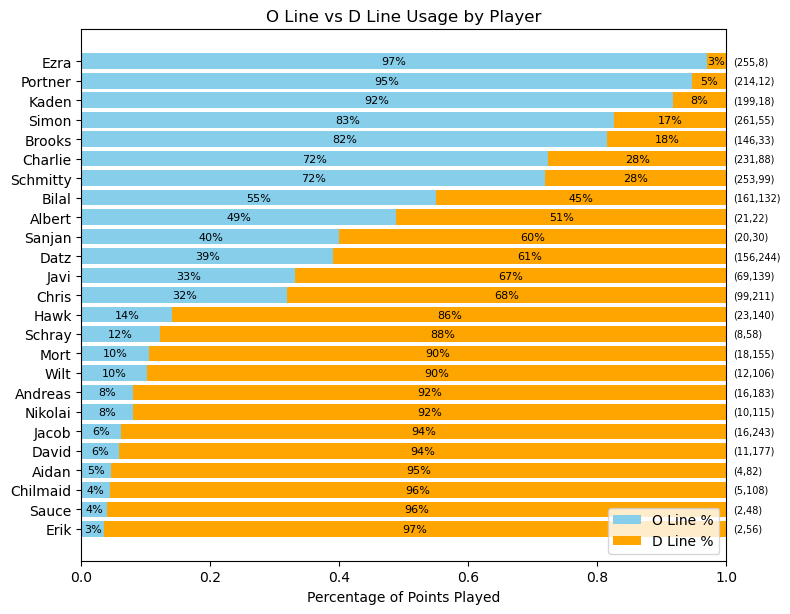

In [31]:
# Graph O Line vs D Line Usage

player_df['O Line %'] = round(100 * player_df['O Points'] / player_df['Points Played'],3)
player_df['D Line %'] = round(100 * player_df['D Points'] / player_df['Points Played'],3)

player_df_sorted = player_df[['Name', 'O Line %', 'D Line %', 'O Points', 'D Points']].sort_values(by='O Line %', ascending=True)

players = player_df_sorted['Name']
o_line = player_df_sorted['O Line %'] / 100
d_line = player_df_sorted['D Line %'] / 100
o_points = player_df_sorted['O Points']
d_points = player_df_sorted['D Points']

# Plot
fig, ax = plt.subplots(figsize=(8, len(players) * 0.25))
ax.barh(players, o_line, color='skyblue', label='O Line %')
ax.barh(players, d_line, left=o_line, color='orange', label='D Line %')

for i, (o, d, op, dp) in enumerate(zip(o_line, d_line, o_points, d_points)):
    ax.text(o / 2, i, f'{o:.0%}', va='center', ha='center', fontsize=8)
    ax.text(o + d / 2, i, f'{d:.0%}', va='center', ha='center', fontsize=8)

    ax.text(1.01, i, f'({int(op)},{int(dp)})', va='center', ha='left', fontsize=7)

ax.set_xlabel('Percentage of Points Played')
ax.set_xlim(0, 1)
ax.set_title('O Line vs D Line Usage by Player')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

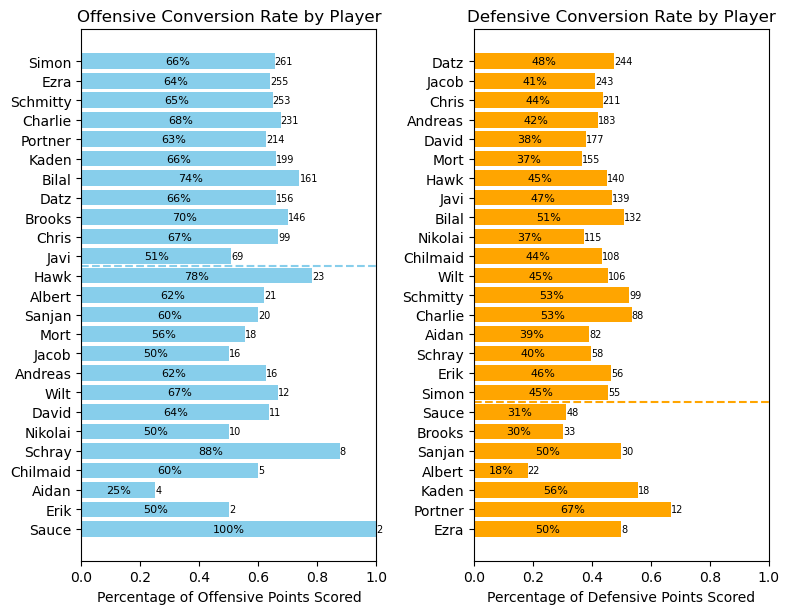

In [32]:
# Graph Offensive and Defensive Conversion Rates

df_sorted1 = player_df[['Name', 'Off Conv %', 'O Points']].sort_values(by='O Points', ignore_index=True)

players = df_sorted1['Name']
o_conv = df_sorted1['Off Conv %'] / 100
o_points = df_sorted1['O Points']

df_sorted2 = player_df[['Name', 'Def Conv %', 'D Points']].sort_values(by='D Points', ignore_index=True)

players2 = df_sorted2['Name']
d_conv = df_sorted2['Def Conv %'] / 100
d_points = df_sorted2['D Points']

# Plot
fig, ax = plt.subplots(1, 2, figsize=(8, len(players) * 0.25))
ax[0].barh(players, o_conv, color='skyblue')
ax[1].barh(players2, d_conv, color='orange')

# Add text labels
for i, (o, p) in enumerate(zip(o_conv, o_points)):
    ax[0].text(o / 2, i, f'{o:.0%}', va='center', ha='center', fontsize=8)
    ax[0].text(o, i, int(p), va='center', ha='left', fontsize=7)
    
for i, (d, p) in enumerate(zip(d_conv, d_points)):
    ax[1].text(d / 2, i, f'{d:.0%}', va='center', ha='center', fontsize=8)
    ax[1].text(d, i, int(p), va='center', ha='left', fontsize=7)

# Add half mean lines
half_mean_Oval = o_points.mean() / 2
half_mean_Oindex = (o_points - half_mean_Oval).abs().idxmin()
ax[0].axhline(half_mean_Oindex + 0.5, linestyle='--', color='skyblue')

half_mean_Dval = d_points.mean() / 2
half_mean_Dindex = (d_points - half_mean_Dval).abs().idxmin()
ax[1].axhline(half_mean_Dindex + 0.5, linestyle='--', color='orange')

# Formatting
ax[0].set_xlabel('Percentage of Offensive Points Scored')
ax[0].set_xlim(0, 1)
ax[0].set_title('Offensive Conversion Rate by Player')

ax[1].set_xlabel('Percentage of Defensive Points Scored')
ax[1].set_xlim(0, 1)
ax[1].set_title('Defensive Conversion Rate by Player')

plt.tight_layout()
plt.show()

In [33]:
# Get player possession production stats
def getPossProductionStats(player_df, point_df):
    
    # ClnHold, ClnFail, Hold Conv., Brk Conv.
    
    # [ [O possessions, Hold, Clean Holds], [D possessions, Breaks, Clean Fails] ]
    possResults = {}
    
    for _, row in point_df.iterrows():
        players = [row[f'Player {i}'] for i in range(7)]

        line = row['Line']
        result = row['Result of Point']
        possessions = row['Possessions']
        
        for player in players:
            if pd.notna(player): # Ensure player name is valid
                if player not in possResults:
                    possResults[player] = [[0,0,0,0],[0,0,0,0]]
                
                # O Line Point
                if line == "O":
                    possResults[player][0][0] += possessions
                    possResults[player][0][3] += 1
                    
                    if result == "Hold": 
                        possResults[player][0][1] += 1 # Line Held
                        if possessions == 1:
                            possResults[player][0][2] += 1 # Clean Hold
                
                # D Line Point        
                else:
                    possResults[player][1][0] += possessions 
                    possResults[player][1][3] += 1

                    if result == "Break": 
                        possResults[player][1][1] += 1 # Line Broke
                    elif possessions == 0:
                        possResults[player][1][2] += 1 # Clean Fail
                    
    # [ [O possessions, Hold, Clean Holds], [D possessions, Breaks, Clean Fails] ]

    # (Holds / O poss), (Breaks, D poss), (Clean Holds, O poss), (Clean Fail, D poss)
    productionStats = {player: [(stats[0][1] / stats[0][0]) * 100, # Hold Conv
                                (stats[1][1] / stats[1][0]) * 100, # Brk Conv
                                (stats[0][2] / stats[0][3]) * 100, # Cln Hold
                                (stats[1][2] / stats[1][3]) * 100, # Cln Fail
                               ] for player, stats in possResults.items()}
    
    
    #print(productionStats)
    player_df[['Hold Conv %', 'Brk Conv %', 'Cln Hold %', 'Cln Fail %']] = player_df['Name'].map(productionStats).apply(pd.Series)
    player_df = player_df.round({'Hold Conv %': 3, 'Brk Conv %': 3, 'Cln Hold %': 3, 'Cln Fail %': 3})

    return player_df

player_df = getPossProductionStats(player_df, point_df)

In [34]:
player_df

,Name,+/-,Points,Goals,Assists,Blocks,Completions,Comp %,Throwaways,Passes Dropped,...,Def Conv %,Off Fail %,Def Fail %,Line,O Line %,D Line %,Hold Conv %,Brk Conv %,Cln Hold %,Cln Fail %
0,Aidan,6.0,2.0,2.0,0.0,6.0,10.0,90.909,1.0,0.0,...,39.024,75.000,60.976,D,4.651,95.349,20.000,33.684,25.000,32.927
1,Albert,0.0,1.0,1.0,0.0,1.0,4.0,80.000,1.0,0.0,...,18.182,38.095,81.818,2 Way,48.837,51.163,44.828,18.182,42.857,40.909
2,Andreas,20.0,16.0,15.0,1.0,16.0,25.0,73.529,7.0,2.0,...,42.077,37.500,57.923,D,8.040,91.960,40.000,43.750,43.750,37.705
3,Bilal,57.0,85.0,31.0,54.0,30.0,335.0,84.171,53.0,10.0,...,50.758,26.087,49.242,2 Way,54.949,45.051,45.769,49.265,37.888,34.091
4,Brooks,22.0,21.0,20.0,1.0,7.0,92.0,94.845,3.0,2.0,...,30.303,30.137,69.697,O,81.564,18.436,42.324,41.667,36.986,42.424
5,Charlie,120.0,98.0,88.0,10.0,37.0,138.0,97.183,4.0,0.0,...,53.409,32.468,46.591,O,72.414,27.586,42.623,52.222,36.797,28.409
6,Chilmaid,7.0,9.0,4.0,5.0,8.0,41.0,83.673,6.0,2.0,...,43.519,40.000,56.481,D,4.425,95.575,50.000,40.517,40.000,37.037
7,Chris,30.0,58.0,9.0,49.0,12.0,391.0,89.679,36.0,9.0,...,43.602,33.333,56.398,D,31.935,68.065,42.038,44.878,37.374,37.915
8,Datz,30.0,83.0,12.0,71.0,32.0,565.0,84.328,75.0,30.0,...,47.541,33.974,52.459,D,39.000,61.000,41.700,45.312,37.821,32.377
9,David,20.0,12.0,10.0,2.0,14.0,60.0,92.308,3.0,2.0,...,37.853,36.364,62.147,D,5.851,94.149,50.000,38.728,45.455,36.723


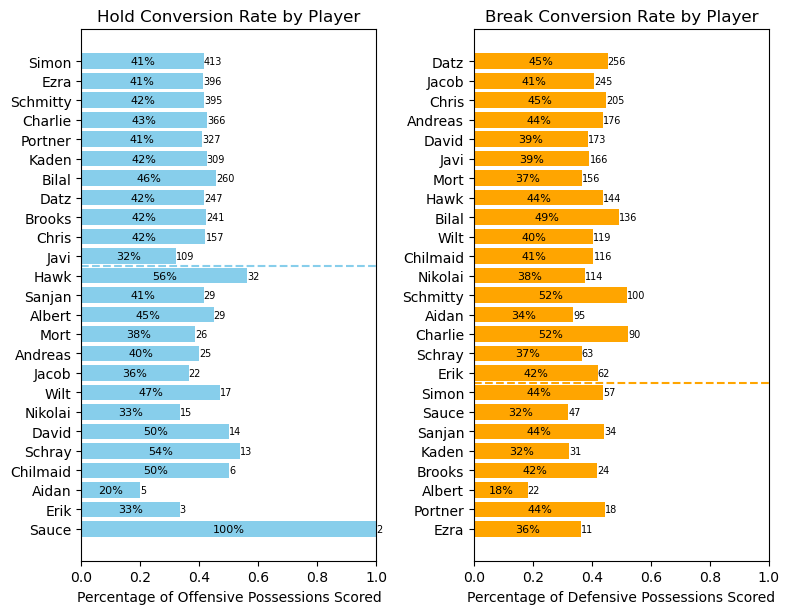

In [35]:
# Graph Hold and Break Conversion Rates

df_sorted1 = player_df[['Name', 'Hold Conv %', 'O Possessions']].sort_values(by='O Possessions', ignore_index=True)

players = df_sorted1['Name']
h_conv = df_sorted1['Hold Conv %'] / 100
o_poss = df_sorted1['O Possessions']

df_sorted2 = player_df[['Name', 'Brk Conv %', 'D Possessions']].sort_values(by='D Possessions', ignore_index=True)

players2 = df_sorted2['Name']
b_conv = df_sorted2['Brk Conv %'] / 100
d_poss = df_sorted2['D Possessions']

# Plot
fig, ax = plt.subplots(1, 2, figsize=(8, len(players) * 0.25))
ax[0].barh(players, h_conv, color='skyblue')
ax[1].barh(players2, b_conv, color='orange')

# Add text labels
for i, (h, p) in enumerate(zip(h_conv, o_poss)):
    ax[0].text(h / 2, i, f'{h:.0%}', va='center', ha='center', fontsize=8)
    ax[0].text(h, i, int(p), va='center', ha='left', fontsize=7)
    
for i, (b, p) in enumerate(zip(b_conv, d_poss)):
    ax[1].text(b / 2, i, f'{b:.0%}', va='center', ha='center', fontsize=8)
    ax[1].text(b, i, int(p), va='center', ha='left', fontsize=7)

# Add half mean lines
half_mean_Hval = o_poss.mean() / 2
half_mean_Hindex = (o_poss - half_mean_Hval).abs().idxmin()
ax[0].axhline(half_mean_Hindex + 0.5, linestyle='--', color='skyblue')

half_mean_Bval = d_poss.mean() / 2
half_mean_Bindex = (d_poss - half_mean_Bval).abs().idxmin()
ax[1].axhline(half_mean_Bindex + 0.5, linestyle='--', color='orange')

# Formatting
ax[0].set_xlabel('Percentage of Offensive Possessions Scored')
ax[0].set_xlim(0, 1)
ax[0].set_title('Hold Conversion Rate by Player')

ax[1].set_xlabel('Percentage of Defensive Possessions Scored')
ax[1].set_xlim(0, 1)
ax[1].set_title('Break Conversion Rate by Player')

plt.tight_layout()
plt.show()

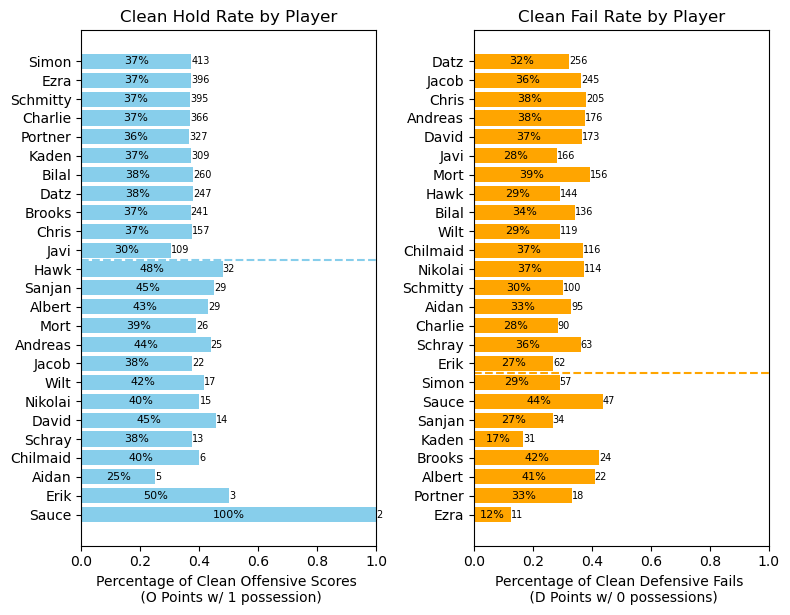

In [36]:
# Graph Clean Hold and Clean Fail Rates

df_sorted1 = player_df[['Name', 'Cln Hold %', 'O Possessions']].sort_values(by='O Possessions', ignore_index=True)

players = df_sorted1['Name']
clean_holds = df_sorted1['Cln Hold %'] / 100
o_poss = df_sorted1['O Possessions']

df_sorted2 = player_df[['Name', 'Cln Fail %', 'D Possessions']].sort_values(by='D Possessions', ignore_index=True)

players2 = df_sorted2['Name']
clean_fails = df_sorted2['Cln Fail %'] / 100
d_poss = df_sorted2['D Possessions']

# Plot
fig, ax = plt.subplots(1, 2, figsize=(8, len(players) * 0.25))
ax[0].barh(players, clean_holds, color='skyblue')
ax[1].barh(players2, clean_fails, color='orange')

# Add text labels
for i, (h, p) in enumerate(zip(clean_holds, o_poss)):
    ax[0].text(h / 2, i, f'{h:.0%}', va='center', ha='center', fontsize=8)
    ax[0].text(h, i, int(p), va='center', ha='left', fontsize=7)
    
for i, (f, p) in enumerate(zip(clean_fails, d_poss)):
    ax[1].text(f / 2, i, f'{f:.0%}', va='center', ha='center', fontsize=8)
    ax[1].text(f, i, int(p), va='center', ha='left', fontsize=7)

# Add half mean lines
half_mean_Hval = o_poss.mean() / 2
half_mean_Hindex = (o_poss - half_mean_Hval).abs().idxmin()
ax[0].axhline(half_mean_Hindex + 0.5, linestyle='--', color='skyblue')

half_mean_Bval = d_poss.mean() / 2
half_mean_Bindex = (d_poss - half_mean_Bval).abs().idxmin()
ax[1].axhline(half_mean_Bindex + 0.5, linestyle='--', color='orange')

# Formatting
ax[0].set_xlabel('Percentage of Clean Offensive Scores \n (O Points w/ 1 possession)')
ax[0].set_xlim(0, 1)
ax[0].set_title('Clean Hold Rate by Player')

ax[1].set_xlabel('Percentage of Clean Defensive Fails \n (D Points w/ 0 possessions)')
ax[1].set_xlim(0, 1)
ax[1].set_title('Clean Fail Rate by Player')

plt.tight_layout()
plt.show()

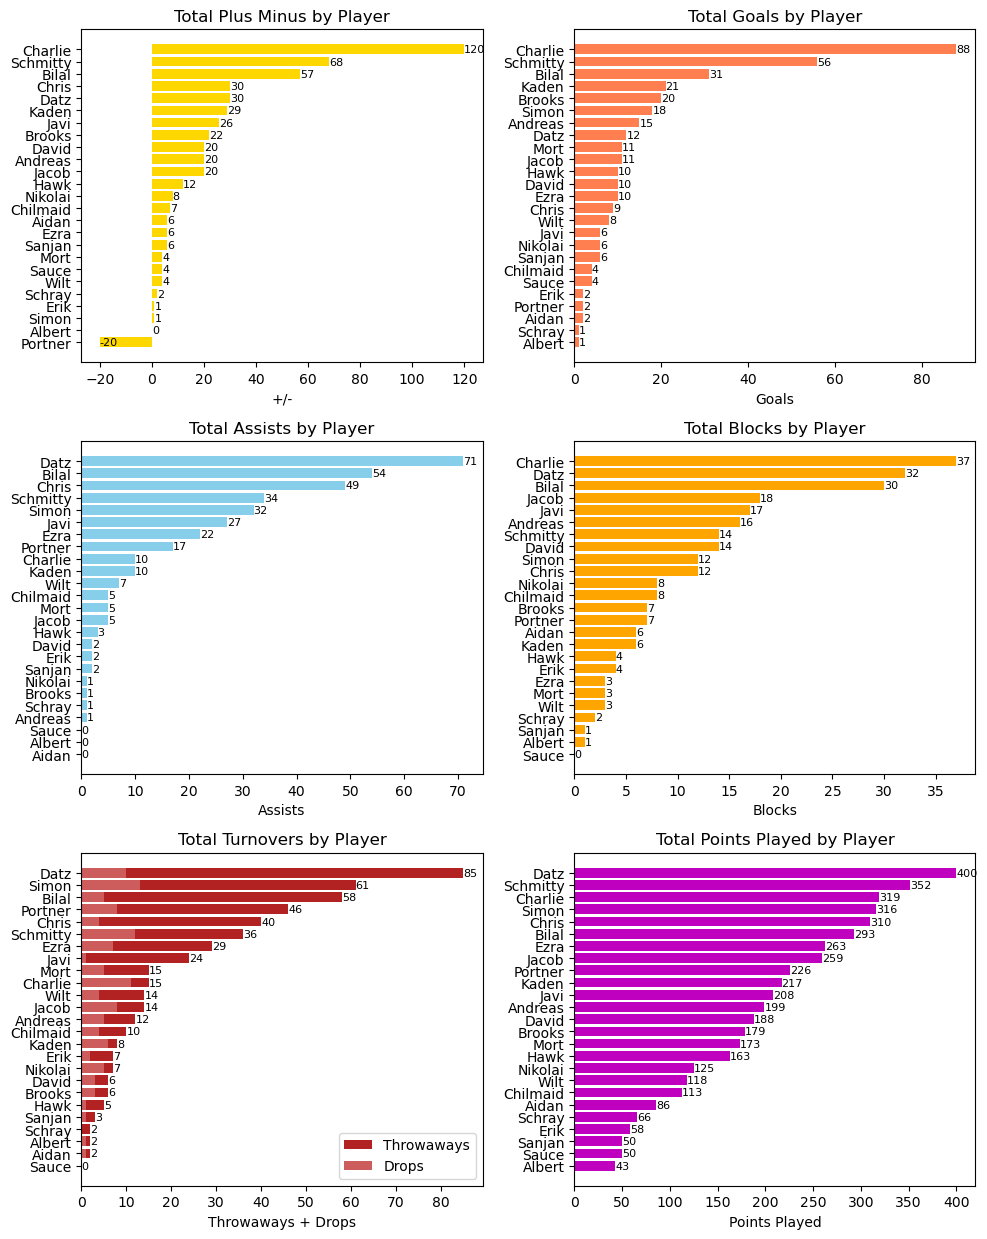

In [37]:
# Graph season total stats

pm_df = player_df[['Name', '+/-']].sort_values(by='+/-')
pm_players = pm_df['Name']
plus_minus = pm_df['+/-']

g_df = player_df[['Name', 'Goals']].sort_values(by='Goals')
g_players = g_df['Name']
goals = g_df['Goals']

g_players1 = g_players

a_df = player_df[['Name', 'Assists']].sort_values(by='Assists')
a_players = a_df['Name']
assists = a_df['Assists']

b_df = player_df[['Name', 'Blocks']].sort_values(by='Blocks')
b_players = b_df['Name']
blocks = b_df['Blocks']

t_df = player_df[['Name', 'Turnovers', 'Drops']].sort_values(by='Turnovers')
t_players = t_df['Name']
turns = t_df['Turnovers']
drops = t_df['Drops']

p_df = player_df[['Name', 'Points Played']].sort_values(by='Points Played')
p_players = p_df['Name']
points = p_df['Points Played']

fig, ax = plt.subplots(3,2, figsize=(10, len(players) * 0.5))

ax[0][0].barh(pm_players, plus_minus, color='gold')
ax[0][1].barh(g_players, goals, color='coral')
ax[1][0].barh(a_players, assists, color='skyblue')
ax[1][1].barh(b_players, blocks, color='orange')
ax[2][0].barh(t_players, turns, color='firebrick', label='Throwaways')
ax[2][0].barh(t_players, drops, color='indianred', label='Drops')
ax[2][1].barh(p_players, points, color='m')


for i, (pm, g, a, b, t, p) in enumerate(zip(plus_minus, goals, assists, blocks, turns, points)):
    ax[0][0].text(pm, i, int(pm), va='center', ha='left', fontsize=8)
    ax[0][1].text(g, i, int(g), va='center', ha='left', fontsize=8)
    ax[1][0].text(a, i, int(a), va='center', ha='left', fontsize=8)
    ax[1][1].text(b, i, int(b), va='center', ha='left', fontsize=8)
    ax[2][0].text(t, i, int(t), va='center', ha='left', fontsize=8)
    ax[2][1].text(p, i, int(p), va='center', ha='left', fontsize=8)

    
# Formatting
ax[0][0].set_xlabel('+/-')
ax[0][0].set_title('Total Plus Minus by Player')
ax[0][1].set_xlabel('Goals')
ax[0][1].set_title('Total Goals by Player')
ax[1][0].set_xlabel('Assists')
ax[1][0].set_title('Total Assists by Player')
ax[1][1].set_xlabel('Blocks')
ax[1][1].set_title('Total Blocks by Player')
ax[2][0].set_xlabel('Throwaways + Drops')
ax[2][0].set_title('Total Turnovers by Player')
ax[2][0].legend()
ax[2][1].set_xlabel('Points Played')
ax[2][1].set_title('Total Points Played by Player')

plt.tight_layout()
plt.show()

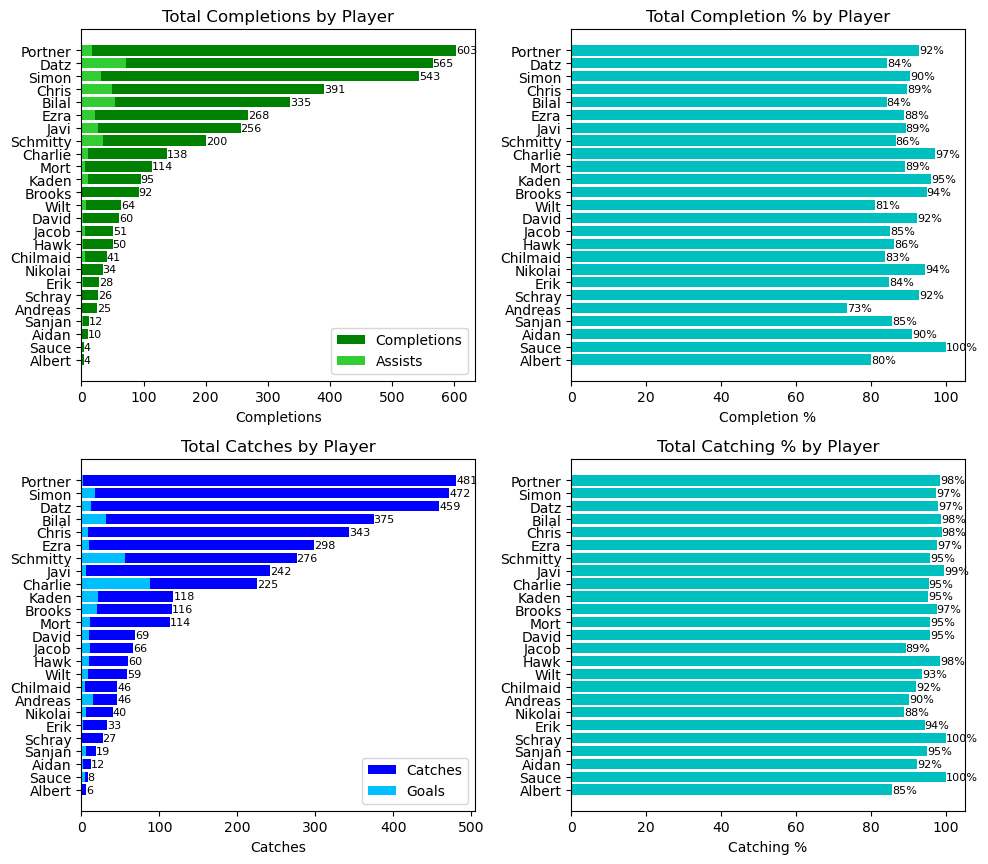

In [38]:
# Graph season total stats pt. 2

c_df = player_df[['Name', 'Completions']].sort_values(by='Completions')
c_players = c_df['Name']
comps = c_df['Completions']

cr_df = player_df[['Name', 'Comp %', 'Completions']].sort_values(by='Completions')
cr_players = cr_df['Name']
compR = cr_df['Comp %']

ca_df = player_df[['Name', 'Catches', 'Drops']].sort_values(by='Catches')
ca_players = ca_df['Name']
catches = ca_df['Catches']

car_df = player_df[['Name', 'Catch %', 'Catches']].sort_values(by='Catches')
car_players = car_df['Name']
catchr = car_df['Catch %']

fig, ax = plt.subplots(2,2, figsize=(10, len(players) * 0.35))

ax[0][0].barh(c_players, comps, color='green', label='Completions')
ax[0][0].barh(a_players, assists, color='limegreen', label='Assists')
ax[0][1].barh(c_players, compR, color='c')

ax[1][0].barh(ca_players, catches, color='blue', label='Catches')
ax[1][0].barh(g_players, goals, color='deepskyblue', label='Goals')
ax[1][1].barh(ca_players, catchr, color='c')

for i, (comp, cmpr, ctch, cthr) in enumerate(zip(comps, compR, catches, catchr)):
    ax[0][0].text(comp, i, int(comp), va='center', ha='left', fontsize=8)
    ax[0][1].text(cmpr, i, f'{int(cmpr)}%', va='center', ha='left', fontsize=8)
    ax[1][0].text(ctch, i, int(ctch), va='center', ha='left', fontsize=8)
    ax[1][1].text(cthr, i, f'{int(cthr)}%', va='center', ha='left', fontsize=8)


ax[0][0].set_xlabel('Completions')
ax[0][0].set_title('Total Completions by Player')
ax[0][0].legend(loc='lower right')
ax[0][1].set_xlabel('Completion %')
ax[0][1].set_title('Total Completion % by Player')
ax[1][0].set_xlabel('Catches')
ax[1][0].set_title('Total Catches by Player')
ax[1][0].legend(loc='lower right')
ax[1][1].set_xlabel('Catching %')
ax[1][1].set_title('Total Catching % by Player')

plt.tight_layout()
plt.show()

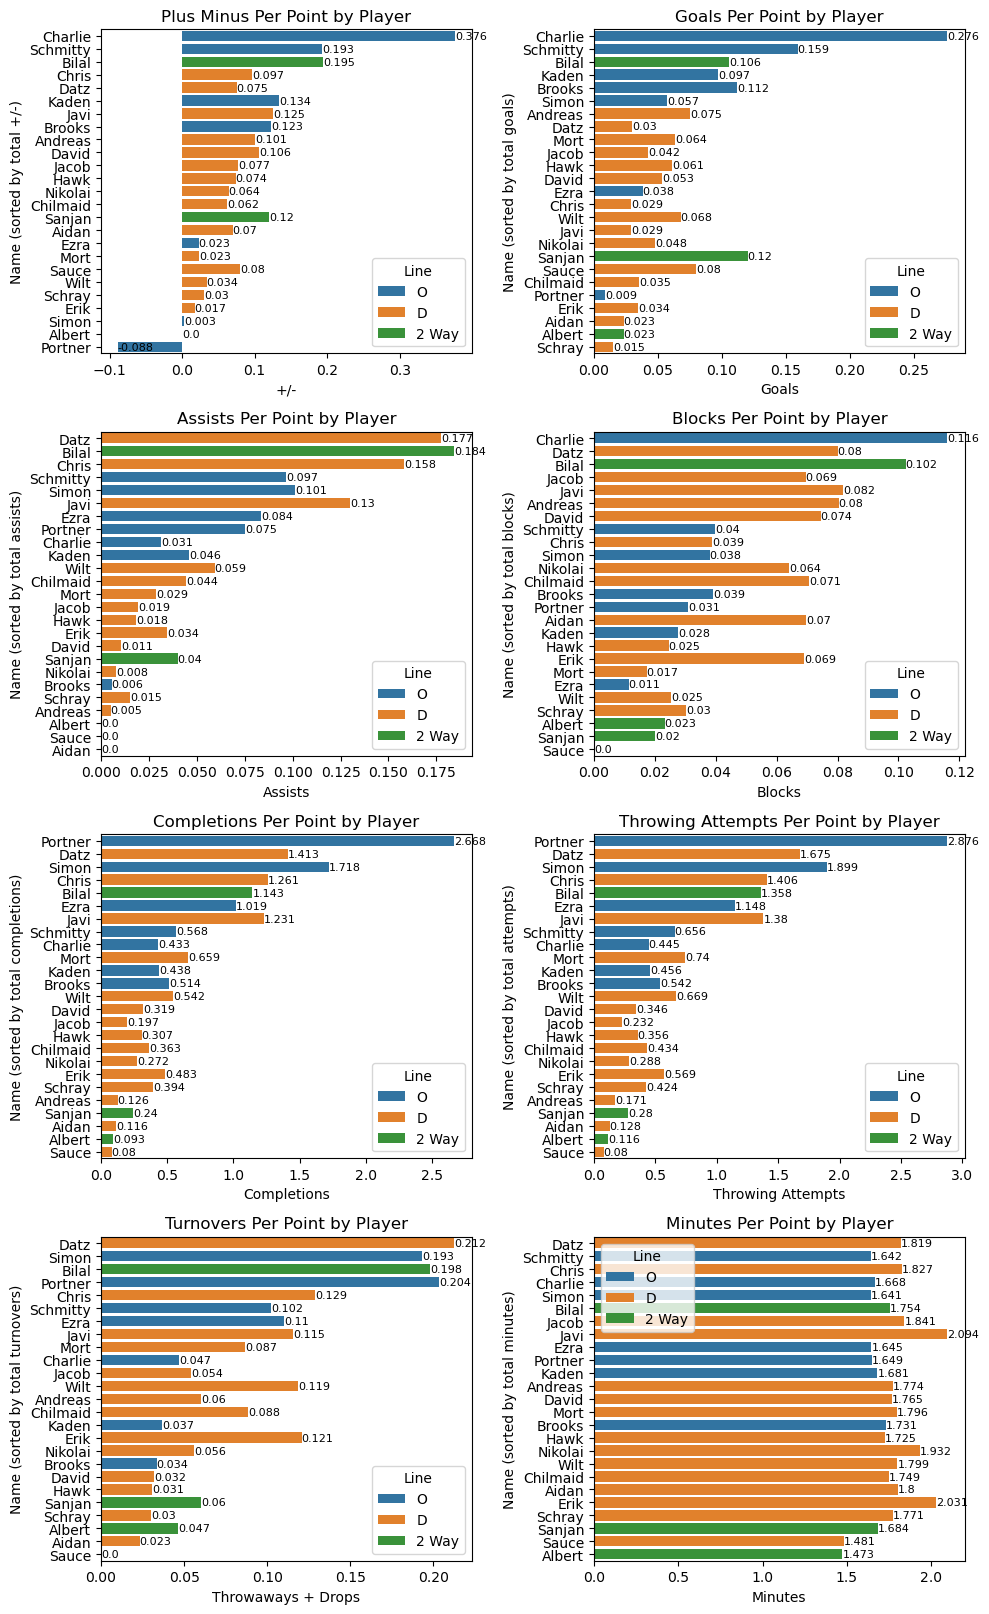

In [39]:
# Graph season total per point stats

# Get per point stats
player_df['+/- pp'] = player_df['+/-'] / player_df['Points Played']
player_df['Goals pp'] = player_df['Goals'] / player_df['Points Played']
player_df['Assists pp'] = player_df['Assists'] / player_df['Points Played']
player_df['Blocks pp'] = player_df['Blocks'] / player_df['Points Played']
player_df['Throwing Attempts pp'] = player_df['Throwing Attempts'] / player_df['Points Played']
player_df['Completions pp'] = player_df['Completions'] / player_df['Points Played']
player_df['Turnovers pp'] = player_df['Turnovers'] / player_df['Points Played']
player_df['Minutes pp'] = player_df['Minutes Played'] / player_df['Points Played']


pm_df = player_df[['Name','+/-','+/- pp','Line']].sort_values(by='+/-', ascending=False)
plus_minus_pp = pm_df['+/- pp']

g_df = player_df[['Name','Goals','Goals pp','Line']].sort_values(by='Goals', ascending=False)
goals_pp = g_df['Goals pp']

a_df = player_df[['Name','Assists','Assists pp','Line']].sort_values(by='Assists', ascending=False)
assists_pp = a_df['Assists pp']

b_df = player_df[['Name','Blocks','Blocks pp','Line']].sort_values(by='Blocks', ascending=False)
blocks_pp = b_df['Blocks pp']

c_df = player_df[['Name','Completions','Completions pp','Line','Throwing Attempts pp']].sort_values(by='Completions', ascending=False)
comps_pp = c_df['Completions pp']
atts_pp = c_df['Throwing Attempts pp']

t_df = player_df[['Name','Turnovers','Drops','Turnovers pp','Line']].sort_values(by='Turnovers', ascending=False)
turns_pp = t_df['Turnovers pp']

m_df = player_df[['Name','Minutes Played','Minutes pp','Line']].sort_values(by='Minutes Played', ascending=False)
mins_pp = m_df['Minutes pp']

fig, ax = plt.subplots(4,2, figsize=(10, len(players) * 0.65))

hues = ['O', 'D', '2 Way']

sns.move_legend(sns.barplot(data=pm_df, x='+/- pp', y='Name', hue='Line', ax=ax[0][0], hue_order = hues, dodge=False),'lower right')
sns.move_legend(sns.barplot(data=g_df, x='Goals pp', y='Name', hue='Line', ax=ax[0][1], hue_order = hues, dodge=False),'lower right')
sns.move_legend(sns.barplot(data=a_df, x='Assists pp', y='Name', hue='Line', ax=ax[1][0], hue_order = hues, dodge=False),'lower right')
sns.move_legend(sns.barplot(data=b_df, x='Blocks pp', y='Name', hue='Line', ax=ax[1][1], hue_order = hues, dodge=False),'lower right')
sns.move_legend(sns.barplot(data=c_df, x='Completions pp', y='Name', hue='Line', ax=ax[2][0], hue_order = hues, dodge=False),'lower right')
sns.move_legend(sns.barplot(data=c_df, x='Throwing Attempts pp', y='Name', hue='Line', ax=ax[2][1], hue_order = hues, dodge=False),'lower right')
sns.move_legend(sns.barplot(data=t_df, x='Turnovers pp', y='Name', hue='Line', ax=ax[3][0], hue_order = hues, dodge=False),'lower right')
sns.move_legend(sns.barplot(data=m_df, x='Minutes pp', y='Name', hue='Line', ax=ax[3][1], hue_order = hues, dodge=False),'upper left')

for i, (pm, g, a, b, c, at, t, m) in enumerate(zip(plus_minus_pp, goals_pp, assists_pp, blocks_pp, comps_pp, atts_pp, turns_pp, mins_pp)):
    ax[0][0].text(pm, i, round(pm,3), va='center', ha='left', fontsize=8)
    ax[0][1].text(g, i, round(g,3), va='center', ha='left', fontsize=8)
    ax[1][0].text(a, i, round(a,3), va='center', ha='left', fontsize=8)
    ax[1][1].text(b, i, round(b,3), va='center', ha='left', fontsize=8)
    ax[2][0].text(c, i, round(c,3), va='center', ha='left', fontsize=8)
    ax[2][1].text(at, i, round(at,3), va='center', ha='left', fontsize=8)
    ax[3][0].text(t, i, round(t,3), va='center', ha='left', fontsize=8)
    ax[3][1].text(m, i, round(m,3), va='center', ha='left', fontsize=8)
    
# Formatting
ax[0][0].set_xlabel('+/-')
ax[0][0].set_ylabel('Name (sorted by total +/-)')
ax[0][0].set_title('Plus Minus Per Point by Player')
ax[0][1].set_xlabel('Goals')
ax[0][1].set_ylabel('Name (sorted by total goals)')
ax[0][1].set_title('Goals Per Point by Player')
ax[1][0].set_xlabel('Assists')
ax[1][0].set_ylabel('Name (sorted by total assists)')
ax[1][0].set_title('Assists Per Point by Player')
ax[1][1].set_xlabel('Blocks')
ax[1][1].set_ylabel('Name (sorted by total blocks)')
ax[1][1].set_title('Blocks Per Point by Player')
ax[2][0].set_xlabel('Completions')
ax[2][0].set_ylabel('Name (sorted by total completions)')
ax[2][0].set_title('Completions Per Point by Player')
ax[2][1].set_xlabel('Throwing Attempts')
ax[2][1].set_ylabel('Name (sorted by total attempts)')
ax[2][1].set_title('Throwing Attempts Per Point by Player')
ax[3][0].set_xlabel('Throwaways + Drops')
ax[3][0].set_ylabel('Name (sorted by total turnovers)')
ax[3][0].set_title('Turnovers Per Point by Player')
ax[3][1].set_xlabel('Minutes')
ax[3][1].set_ylabel('Name (sorted by total minutes)')
ax[3][1].set_title('Minutes Per Point by Player')

plt.tight_layout()
plt.show()

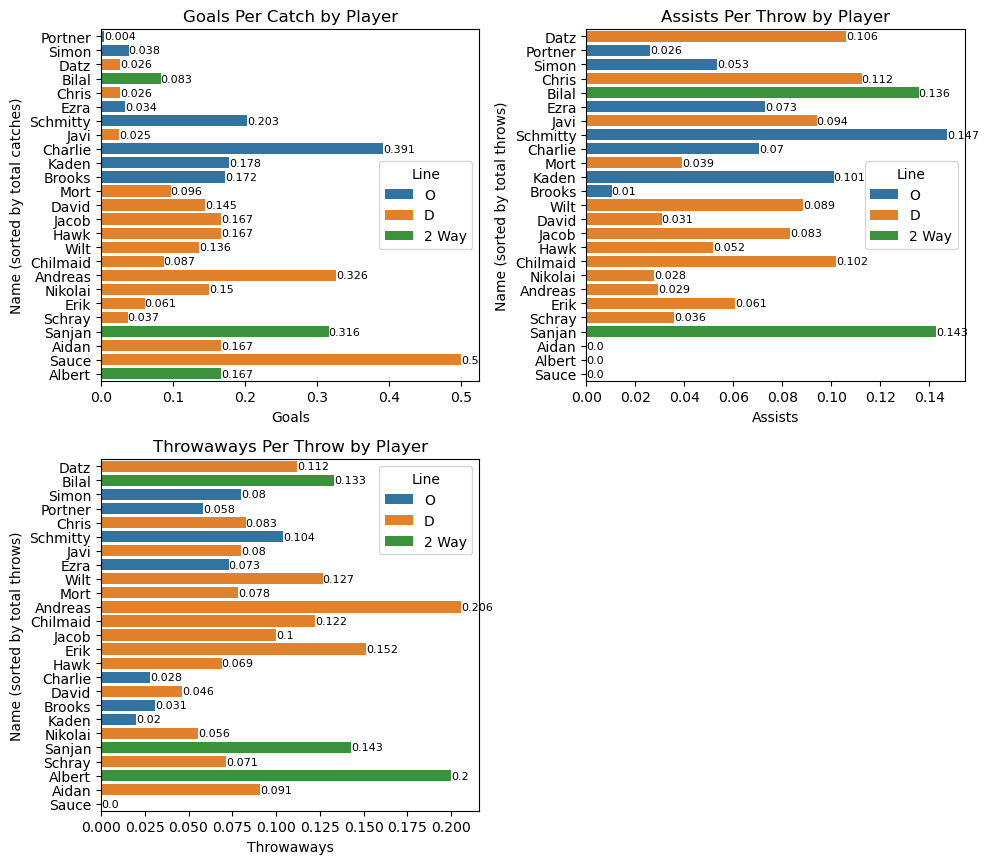

In [40]:
# goals + assists per catch and throw
# throwaways per throw

gpc_df = player_df[['Name','Goals','Catches','Line']].sort_values(by='Catches', ascending=False)
goals_pc = gpc_df['gpc'] = gpc_df['Goals'] / gpc_df['Catches']

apt_df = player_df[['Name','Assists','Throwing Attempts','Line']].sort_values(by='Throwing Attempts', ascending=False)
assists_pt = apt_df['apt'] = apt_df['Assists'] / (apt_df['Throwing Attempts'])

tpt_df = player_df[['Name','Throwaways','Throwing Attempts','Line']].sort_values(by='Throwaways', ascending=False)
turns_pt = tpt_df['tpt'] = tpt_df['Throwaways'] / tpt_df['Throwing Attempts']

fig, ax = plt.subplots(2,2, figsize=(10, len(players) * 0.35))

sns.move_legend(sns.barplot(data=gpc_df, x='gpc', y='Name', hue='Line', ax=ax[0][0], hue_order = hues, dodge=False),'center right')
sns.move_legend(sns.barplot(data=apt_df, x='apt', y='Name', hue='Line', ax=ax[0][1], hue_order = hues, dodge=False),'center right')
sns.move_legend(sns.barplot(data=tpt_df, x='tpt', y='Name', hue='Line', ax=ax[1][0], hue_order = hues, dodge=False),'upper right')


for i, (gpc, apt, tpt) in enumerate(zip(goals_pc, assists_pt, turns_pt)):
    ax[0][0].text(gpc, i, round(gpc,3), va='center', ha='left', fontsize=8)
    ax[0][1].text(apt, i, round(apt,3), va='center', ha='left', fontsize=8)
    ax[1][0].text(tpt, i, round(tpt,3), va='center', ha='left', fontsize=8)

ax[0][0].set_xlabel('Goals')
ax[0][0].set_ylabel('Name (sorted by total catches)')
ax[0][0].set_title('Goals Per Catch by Player')
ax[0][1].set_xlabel('Assists')
ax[0][1].set_ylabel('Name (sorted by total throws)')
ax[0][1].set_title('Assists Per Throw by Player')
ax[1][0].set_xlabel('Throwaways')
ax[1][0].set_ylabel('Name (sorted by total throws)')
ax[1][0].set_title('Throwaways Per Throw by Player')

ax[1][1].set_visible(False)

plt.tight_layout()
plt.show()

In [41]:
# Create line dataframe
def getLines(df):
    lines = {}
    
    for index, row in df.iterrows():
        players = frozenset(row[f'Player {i}'] for i in range(7))
                
        if players not in lines:
            lines[players] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
            
        lines[players][0] += 1
  
        if row['Line'] == 'O':
                lines[players][1] += 1
        else:
            lines[players][2] += 1
                
        if row['Result of Point'] in ['Hold', 'Break']:
            lines[players][3] += 1
        else:
            lines[players][4] += 1
                
        lines[players][5] += row['Passes']
        lines[players][6] += row['Turnovers']
        lines[players][7] += row['Blocks']
        lines[players][8] += (row['Point Elapsed Seconds'] / 60)
        lines[players][9] += row['Possessions']
        
    return lines

line_df = pd.DataFrame({'Names': line, 
                        'Points Played': stats[0], 
                        'O Points': stats[1],
                        'D Points': stats[2],
                        'Goals': stats[3],
                        'Losses': stats[4],
                        'Passes': stats[5],
                        'Turnovers': stats[6],
                        'Blocks': stats[7],
                        'Minutes Played': stats[8],
                        'Possessions': stats[9]
                       } for line, stats in getLines(point_df).items())

line_df['Line Type'] = line_df.apply(classify_line, axis=1)
line_df['Win %'] = (line_df['Goals'] / line_df['Points Played'] * 100)
line_df['Names_abr'] = np.nan

In [42]:
# Create a column with abreviated names for visualization 
def abbreviateLines(df):
    def abbreviateName(name):
        special_abbr = {'Schmitty': "Schm", 'Schray': "Schr", 'Sanjan': "Saj"}
        return special_abbr.get(name, name[:3])
   
    def abbreviate(names):
        abbrs = sorted([abbreviateName(name) for name in names])
        return ", ".join(abbrs)
        
    df['Names_abr'] = df['Names'].apply(abbreviate)
    
    return df

line_df = abbreviateLines(line_df)

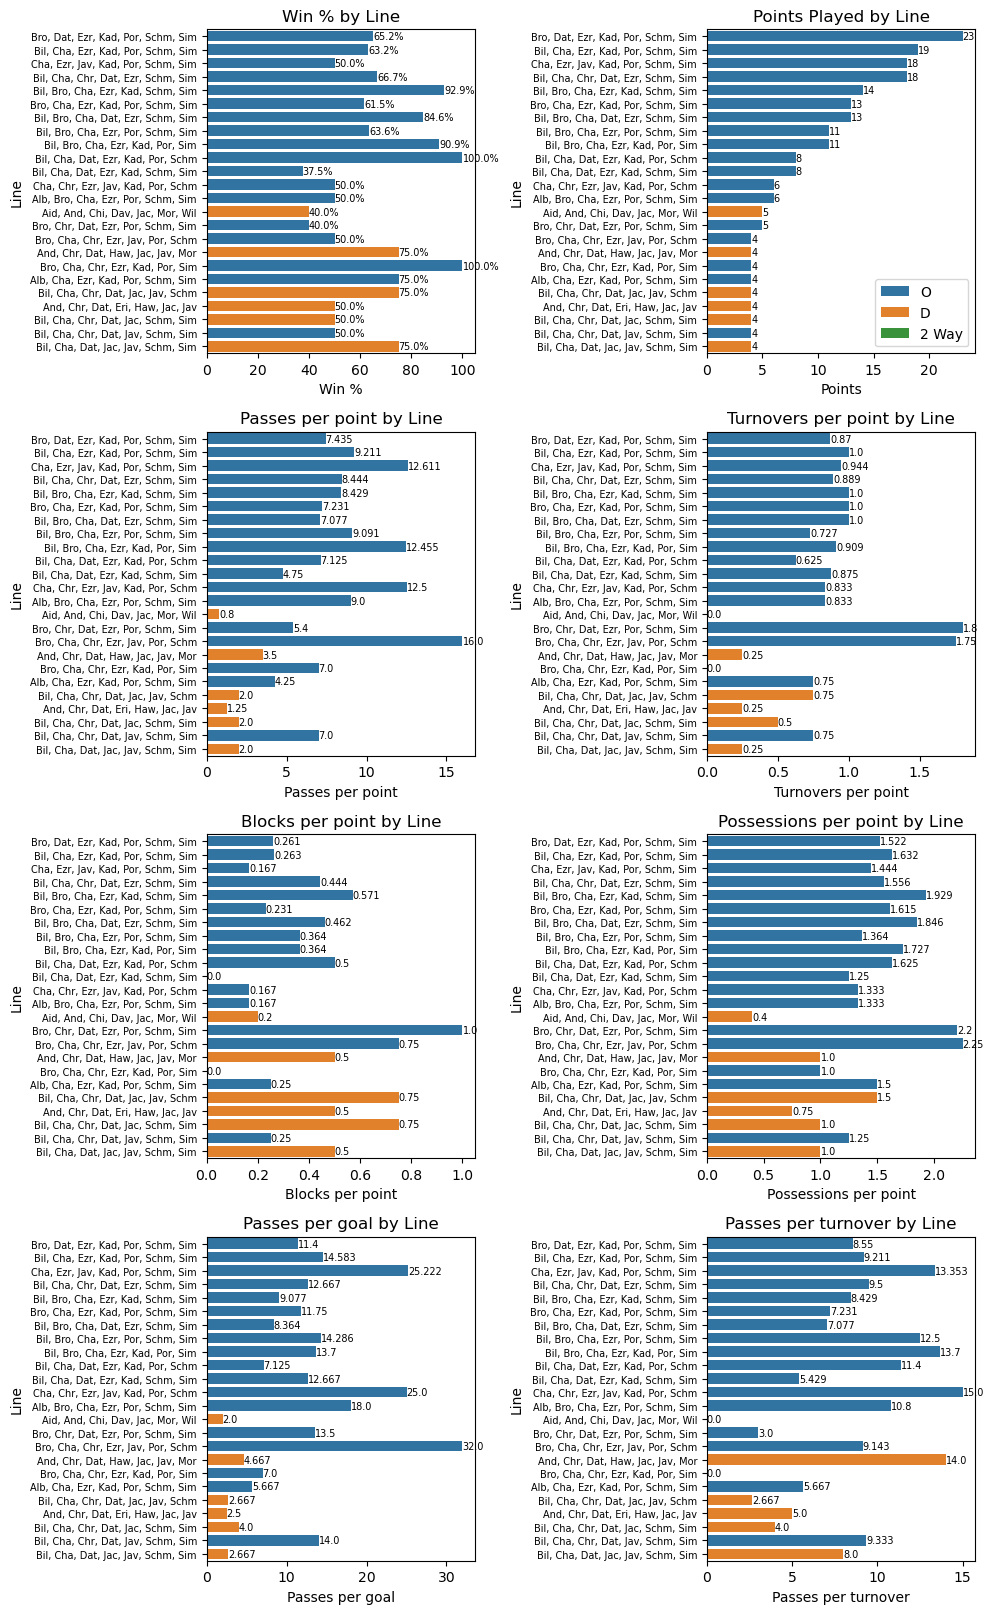

In [43]:
top_lines = line_df.loc[line_df['Points Played'] >= 4]
top_lines.sort_values(by='Points Played', ascending=False, inplace=True)

top_lines['ppp'] = top_lines['Passes'] / top_lines['Points Played']

top_lines['tpp'] = top_lines['Turnovers'] / top_lines['Points Played']

top_lines['bpp'] = top_lines['Blocks'] / top_lines['Points Played']

top_lines['pspp'] = top_lines['Possessions'] / top_lines['Points Played']

top_lines['pgr'] = (top_lines['Passes'] / top_lines['Goals']).where(top_lines['Goals'] != 0, 0)

top_lines['ptr'] = (top_lines['Passes'] / top_lines['Turnovers']).where(top_lines['Turnovers'] != 0, 0)

fig, ax = plt.subplots(4,2, figsize=(10, len(players) * 0.65))


sns.barplot(data=top_lines, x='Win %', y='Names_abr', hue='Line Type', ax=ax[0][0], hue_order = hues, dodge=False)
sns.barplot(data=top_lines, x='Points Played', y='Names_abr', hue='Line Type', ax=ax[0][1], hue_order = hues, dodge=False)
sns.barplot(data=top_lines, x='ppp', y='Names_abr', hue='Line Type', ax=ax[1][0], hue_order = hues, dodge=False)
sns.barplot(data=top_lines, x='tpp', y='Names_abr', hue='Line Type', ax=ax[1][1], hue_order = hues, dodge=False)
sns.barplot(data=top_lines, x='bpp', y='Names_abr', hue='Line Type', ax=ax[2][0], hue_order = hues, dodge=False)
sns.barplot(data=top_lines, x='pspp', y='Names_abr', hue='Line Type', ax=ax[2][1], hue_order = hues, dodge=False)
sns.barplot(data=top_lines, x='pgr', y='Names_abr', hue='Line Type', ax=ax[3][0], hue_order = hues, dodge=False)
sns.barplot(data=top_lines, x='ptr', y='Names_abr', hue='Line Type', ax=ax[3][1], hue_order = hues, dodge=False)

for i, (w, pp, p, t, b, ps, pg, pt) in enumerate(zip(top_lines['Win %'], top_lines['Points Played'], 
                                                     top_lines['ppp'], top_lines['tpp'],
                                                     top_lines['bpp'], top_lines['pspp'], 
                                                     top_lines['pgr'], top_lines['ptr'])):
    ax[0][0].text(w, i, f'{round(w,1)}%', va='center', ha='left', fontsize=7)
    ax[0][1].text(pp, i, int(pp), va='center', ha='left', fontsize=7)
    ax[1][0].text(p, i, round(p,3), va='center', ha='left', fontsize=7)
    ax[1][1].text(t, i, round(t,3), va='center', ha='left', fontsize=7)
    ax[2][0].text(b, i, round(b,3), va='center', ha='left', fontsize=7)
    ax[2][1].text(ps, i, round(ps,3), va='center', ha='left', fontsize=7)
    ax[3][0].text(pg, i, round(pg,3), va='center', ha='left', fontsize=7)
    ax[3][1].text(pt, i, round(pt,3), va='center', ha='left', fontsize=7)
    

for i in range(len(ax)):
    for j in range(2):
        ax[i][j].tick_params(axis='y', labelsize=7)
        ax[i][j].legend().remove()

ax[0][0].set_xlabel('Win %')
ax[0][0].set_ylabel('Line')
ax[0][0].set_title('Win % by Line')
ax[0][1].set_xlabel('Points')
ax[0][1].set_ylabel('Line')
ax[0][1].set_title('Points Played by Line')
ax[0][1].legend()
ax[1][0].set_xlabel('Passes per point')
ax[1][0].set_ylabel('Line')
ax[1][0].set_title('Passes per point by Line')
ax[1][1].set_xlabel('Turnovers per point')
ax[1][1].set_ylabel('Line')
ax[1][1].set_title('Turnovers per point by Line')
ax[2][0].set_xlabel('Blocks per point')
ax[2][0].set_ylabel('Line')
ax[2][0].set_title('Blocks per point by Line')
ax[2][1].set_xlabel('Possessions per point')
ax[2][1].set_ylabel('Line')
ax[2][1].set_title('Possessions per point by Line')
ax[3][0].set_xlabel('Passes per goal')
ax[3][0].set_ylabel('Line')
ax[3][0].set_title('Passes per goal by Line')
ax[3][1].set_xlabel('Passes per turnover')
ax[3][1].set_ylabel('Line')
ax[3][1].set_title('Passes per turnover by Line')


plt.tight_layout()
plt.show()

In [44]:
print(line_df.loc[line_df['Points Played'] >= 4].count())

#line_df.loc[line_df['Line Type'] == 'D'].sort_values(by='Points Played', ascending=False).head(20)

Names             24
Points Played     24
O Points          24
D Points          24
Goals             24
Losses            24
Passes            24
Turnovers         24
Blocks            24
Minutes Played    24
Possessions       24
Line Type         24
Win %             24
Names_abr         24
dtype: int64


In [45]:
#line_df.sort_values(by='Points Played', ascending=False).head(20)

In [46]:
# split line vizzes by top 25 O and D line?
#   turn shit into a method and have O or D as a parameter

# player combinations
# loop through line_df and get all the lines that have x players on it
player_df

,Name,+/-,Points,Goals,Assists,Blocks,Completions,Comp %,Throwaways,Passes Dropped,...,Cln Hold %,Cln Fail %,+/- pp,Goals pp,Assists pp,Blocks pp,Throwing Attempts pp,Completions pp,Turnovers pp,Minutes pp
0,Aidan,6.0,2.0,2.0,0.0,6.0,10.0,90.909,1.0,0.0,...,25.000,32.927,0.069767,0.023256,0.000000,0.069767,0.127907,0.116279,0.023256,1.800233
1,Albert,0.0,1.0,1.0,0.0,1.0,4.0,80.000,1.0,0.0,...,42.857,40.909,0.000000,0.023256,0.000000,0.023256,0.116279,0.093023,0.046512,1.473256
2,Andreas,20.0,16.0,15.0,1.0,16.0,25.0,73.529,7.0,2.0,...,43.750,37.705,0.100503,0.075377,0.005025,0.080402,0.170854,0.125628,0.060302,1.773819
3,Bilal,57.0,85.0,31.0,54.0,30.0,335.0,84.171,53.0,10.0,...,37.888,34.091,0.194539,0.105802,0.184300,0.102389,1.358362,1.143345,0.197952,1.753857
4,Brooks,22.0,21.0,20.0,1.0,7.0,92.0,94.845,3.0,2.0,...,36.986,42.424,0.122905,0.111732,0.005587,0.039106,0.541899,0.513966,0.033520,1.730726
5,Charlie,120.0,98.0,88.0,10.0,37.0,138.0,97.183,4.0,0.0,...,36.797,28.409,0.376176,0.275862,0.031348,0.115987,0.445141,0.432602,0.047022,1.667837
6,Chilmaid,7.0,9.0,4.0,5.0,8.0,41.0,83.673,6.0,2.0,...,40.000,37.037,0.061947,0.035398,0.044248,0.070796,0.433628,0.362832,0.088496,1.749115
7,Chris,30.0,58.0,9.0,49.0,12.0,391.0,89.679,36.0,9.0,...,37.374,37.915,0.096774,0.029032,0.158065,0.038710,1.406452,1.261290,0.129032,1.827194
8,Datz,30.0,83.0,12.0,71.0,32.0,565.0,84.328,75.0,30.0,...,37.821,32.377,0.075000,0.030000,0.177500,0.080000,1.675000,1.412500,0.212500,1.819250
9,David,20.0,12.0,10.0,2.0,14.0,60.0,92.308,3.0,2.0,...,45.455,36.723,0.106383,0.053191,0.010638,0.074468,0.345745,0.319149,0.031915,1.765053


In [47]:
# Machiiiiine Learrrrrning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [48]:
# Feature Selection
X = player_df[['+/- pp', 'Goals pp', 'Assists pp', 'Blocks pp', 'Throwing Attempts pp', 
               'Comp %', 'Turnovers pp', 'Off Conv %', 'Def Conv %']]

# Scale values from [-1,1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
# Try 3, 42
kmeans = KMeans(n_clusters=3, random_state=3)
clusters = kmeans.fit_predict(X_scaled)

In [50]:
clusters

array([2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2], dtype=int32)

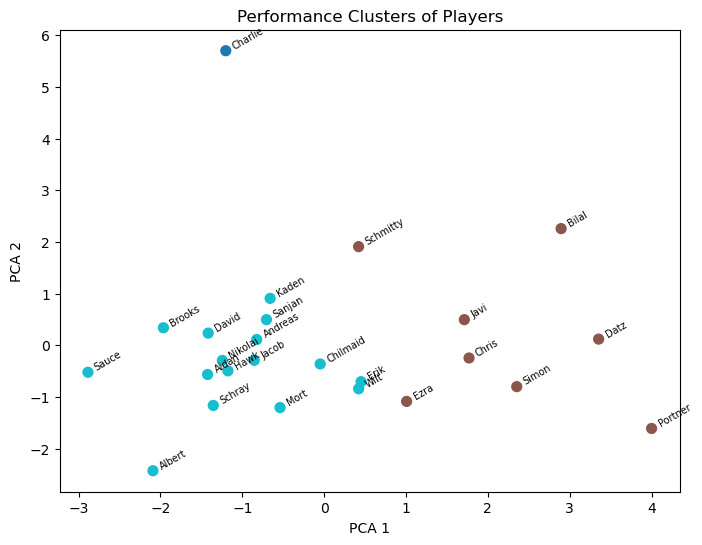

[[-0.11147049 -0.12538259  0.48734358  0.11505511  0.51741441 -0.11410644
   0.54531015 -0.05670409  0.37389253]
 [ 0.62688093  0.57748785  0.1363085   0.40237845 -0.0608935   0.15313003
  -0.02229836  0.05169837  0.25042544]]


In [51]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='tab10', s=50)

for index, row in player_df.iterrows():
    plt.text(components[index, 0] + 0.06, components[index, 1] + 0.04, row['Name'], rotation=30, fontsize=7)
    
plt.title('Performance Clusters of Players')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
print(pca.components_)

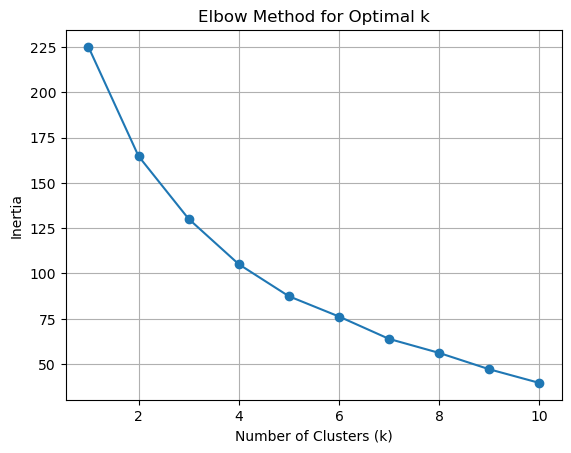

In [52]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to nearest cluster center

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [53]:
player_df['Performance'] = clusters

In [54]:
player_df[['Name', 'Performance']].sort_values(by='Performance')

,Name,Performance
5,Charlie,0
21,Schmitty,1
3,Bilal,1
7,Chris,1
8,Datz,1
18,Portner,1
11,Ezra,1
23,Simon,1
14,Javi,1
0,Aidan,2


In [55]:
player_df.columns

Index(['Name', '+/-', 'Points', 'Goals', 'Assists', 'Blocks', 'Completions',
       'Comp %', 'Throwaways', 'Passes Dropped', 'Throwing Attempts',
       'Catches', 'Catch %', 'Drops', 'Turnovers', 'Games Played',
       'Minutes Played', 'Points Played', 'O Points', 'O Possessions',
       'D Points', 'D Possessions', 'Off Conv %', 'Def Conv %', 'Off Fail %',
       'Def Fail %', 'Line', 'O Line %', 'D Line %', 'Hold Conv %',
       'Brk Conv %', 'Cln Hold %', 'Cln Fail %', '+/- pp', 'Goals pp',
       'Assists pp', 'Blocks pp', 'Throwing Attempts pp', 'Completions pp',
       'Turnovers pp', 'Minutes pp', 'Performance'],
      dtype='object')

In [56]:
loadings = pca.components_.T

print("PCA Feature Contributions:")
for i, feature in enumerate(X):
    pc1_loading = loadings[i, 0]
    pc2_loading = loadings[i, 1]
    print(f"{feature}: PC1 = {pc1_loading:.3f}, PC2 = {pc2_loading:.3f}")

PCA Feature Contributions:
+/- pp: PC1 = -0.111, PC2 = 0.627
Goals pp: PC1 = -0.125, PC2 = 0.577
Assists pp: PC1 = 0.487, PC2 = 0.136
Blocks pp: PC1 = 0.115, PC2 = 0.402
Throwing Attempts pp: PC1 = 0.517, PC2 = -0.061
Comp %: PC1 = -0.114, PC2 = 0.153
Turnovers pp: PC1 = 0.545, PC2 = -0.022
Off Conv %: PC1 = -0.057, PC2 = 0.052
Def Conv %: PC1 = 0.374, PC2 = 0.250


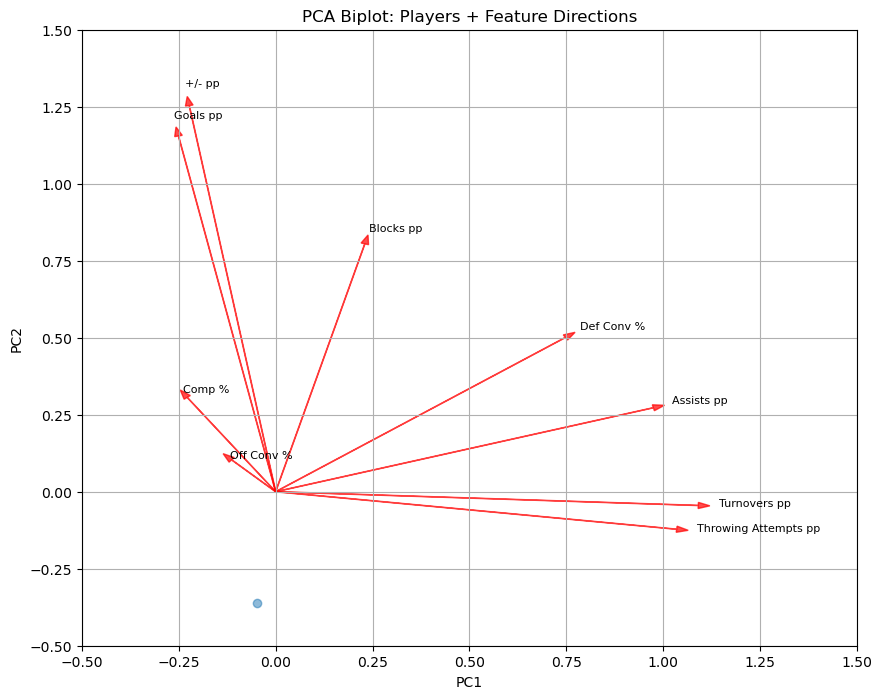

In [57]:
plt.figure(figsize=(10, 8))
plt.scatter(components[:, 0], components[:, 1], alpha=0.5)

for i, X in enumerate(X):
    plt.arrow(0, 0,                  # start at origin
              pca.components_[0, i] * 2, # x-component
              pca.components_[1, i] * 2, # y-component
              color='red', alpha=0.7, head_width=0.02)
    plt.text(pca.components_[0, i] * 2.1,
             pca.components_[1, i] * 2.1,
             X, color='black', fontsize=8)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.title("PCA Biplot: Players + Feature Directions")
plt.grid(True)
plt.show()